In [1]:
import pandas as pd
import warnings
from arch import arch_model
from pmdarima.arima import auto_arima
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [2]:
stock_all = pd.read_csv("전체기간.csv",index_col = 0)

In [4]:
model = auto_arima(stock_all['롯데리츠'])
p,d,q = model.order

if p == 0:
    p = 1

k = max(p,q)

model = arch_model(stock_all['롯데리츠'], vol='GARCH' ,p = k ,q = p)
result = model.fit(disp = 'off')

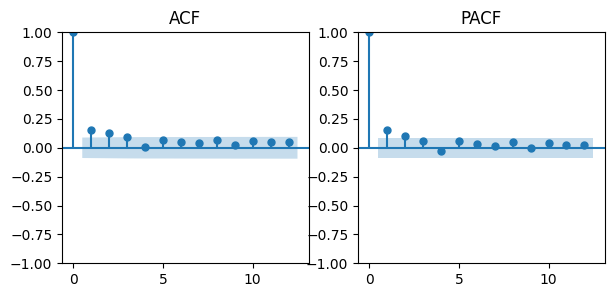

auto_arima p:1 q:1


In [5]:
fig = plt.figure(figsize = (7,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sgt.plot_acf(stock_all['롯데리츠'],lags=12,zero=True,ax=ax1)
ax1.set_title("ACF")

sgt.plot_pacf(stock_all['롯데리츠'],lags=12,zero=True,method=('ols'),ax=ax2)
ax2.set_title("PACF")

plt.show()

print(f"auto_arima p:{p} q:{q}")

In [69]:
residuals = result.resid

In [71]:
shapiro_test = stats.shapiro(residuals)
shapiro_test

ShapiroResult(statistic=0.9904276132583618, pvalue=0.686451256275177)

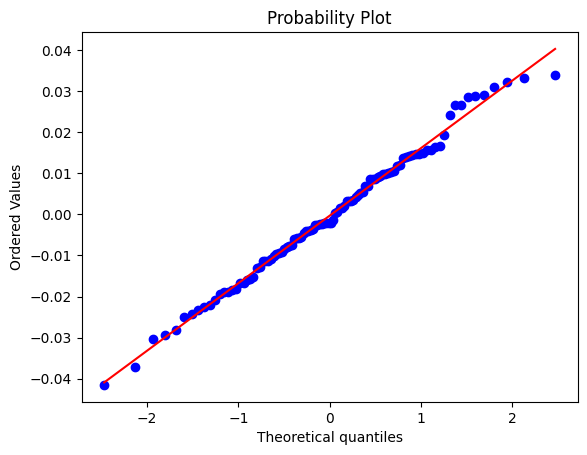

In [72]:
stats.probplot(residuals, dist=stats.norm, plot=plt)
plt.show()

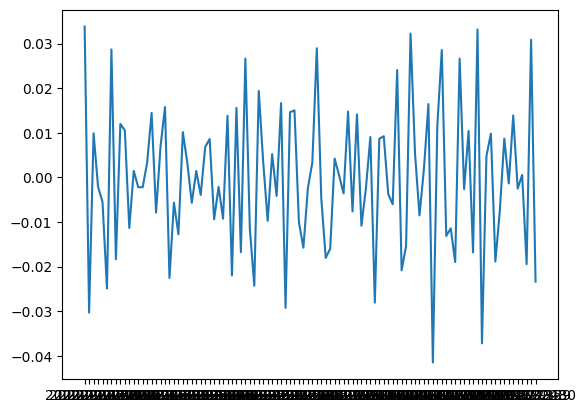

In [59]:
plt.plot(residuals)
plt.show()

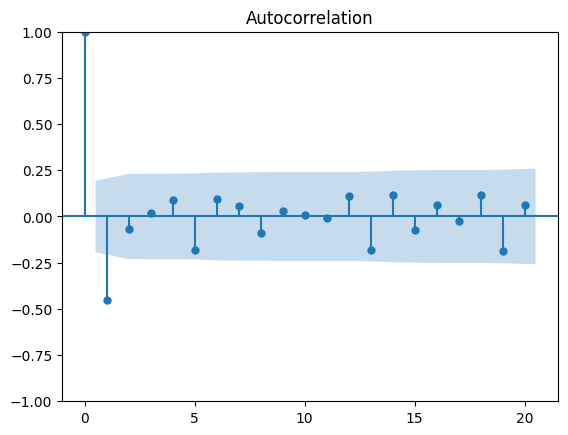

In [75]:
acf = sm.graphics.tsa.plot_acf(residuals, lags=20)

In [105]:
c_name = ['SK리츠','롯데리츠','코람코라이프인프라리츠','신한서부티앤디리츠','코람코더원리츠']
for i in c_name:
    model = auto_arima(stock_all[i])
    p,d,q = model.order
    
    if p == 0:
        p = 1
    
    k = max(p,q)
    model = arch_model(stock_all[i], vol='EGARCH' ,p = k ,q = p)
    result = model.fit(disp = 'off')
    residuals = result.resid
    normality_test = sm.stats.diagnostic.normal_ad(residuals)
    heteroscedasticity_test = sm.stats.diagnostic.het_arch(residuals)
    print(f"{i} Normality test p-value: {normality_test[1]:.4f}")
    print(f"{i} Heteroscedasticity test p-value: {heteroscedasticity_test[1]:.4f}" )

SK리츠 Normality test p-value: 0.0000
SK리츠 Heteroscedasticity test p-value: 0.0000
롯데리츠 Normality test p-value: 0.0000
롯데리츠 Heteroscedasticity test p-value: 0.0000



KeyboardInterrupt



In [82]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [103]:
stock_all = pd.read_csv("전체기간.csv",index_col = 0)

In [104]:
stock_all = stock_all.diff().dropna()

In [98]:
for i in c_name:
    print(f"{i}의 adf: {adfuller(stock_all[i])[1]}")
    print(f"{i}의 kpss: {kpss(stock_all[i])[1]}")
    

SK리츠의 adf: 0.0
SK리츠의 kpss: 0.1
롯데리츠의 adf: 1.607719809547662e-18
롯데리츠의 kpss: 0.1
코람코라이프인프라리츠의 adf: 1.905476296709049e-11
코람코라이프인프라리츠의 kpss: 0.1
신한서부티앤디리츠의 adf: 2.2579320722047933e-26
신한서부티앤디리츠의 kpss: 0.1
코람코더원리츠의 adf: 1.5238622623374626e-09
코람코더원리츠의 kpss: 0.1
